# Dasar clustering

### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Model
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

### Load data

In [3]:
df = pd.read_csv('Country_clusters.csv')

In [4]:
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Plot data

<function matplotlib.pyplot.show(close=None, block=None)>

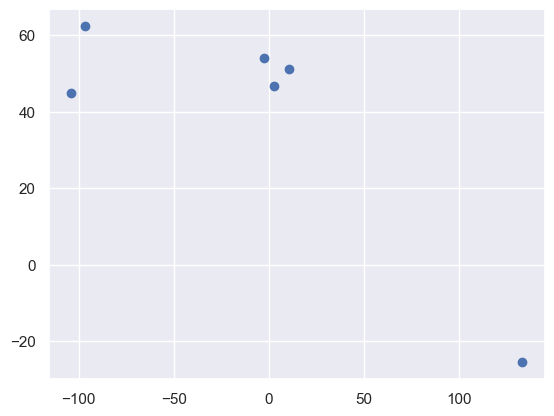

In [5]:
plt.scatter(df['Longitude'],df['Latitude'])
plt.show

### Memilih feature

Sekarang saatnya menyiapkan data untuk pengelompokan. Kolom `Country` masih merupakan string pengidentifikasi unik, sehingga tidak akan berguna untuk pengelompokan, karena unik untuk setiap data.

#### Mencoba clustering berdasarkan `Longitude` dan `Latitude`

In [32]:
X = df[['Longitude','Latitude']]
X

,Longitude,Latitude
0,-103.77,44.97
1,-96.80,62.40
2,2.40,46.75
3,-2.53,54.01
4,10.40,51.15
5,133.11,-25.45


Nilai K apa yang menurut Anda merupakan pilihan yang baik? Apakah ada banyak pilihan yang masuk akal? Fitur apa yang membantu menentukan pilihan cluster ini. Karena ini adalah unsupervised learning, tidak ada jawaban yang 100% benar di sini.

### Clustering

In [42]:
# Membuat model clustering
# Angka dalam kurung adalah K, atau jumlah cluster yang kita tuju
kmeans = KMeans(4)

In [43]:
# fit model dengan fitur
kmeans.fit(X)

KMeans(n_clusters=4)

### Hasil Clustering

In [44]:
kmeans.labels_

array([3, 1, 0, 0, 0, 2])

**Hasil prediksi clustering pada k-means tidak memiliki arti langsung dalam konteks interpretasi. Ketika Anda menjalankan metode k-means clustering pada suatu dataset, algoritma akan mengelompokkan data ke dalam kelompok-kelompok berdasarkan jarak antara titik data dan pusat cluster terdekat. Setiap titik data akan diberikan label kluster berdasarkan kelompok mana yang memiliki pusat cluster terdekat dengannya.**

Namun, penting untuk dicatat bahwa hasil prediksi klaster tidak memiliki makna inheren di luar algoritma itu sendiri. Artinya, label klaster yang diberikan oleh k-means hanyalah representasi angka untuk setiap kelompok, dan tidak memiliki makna tertentu dalam konteks data tersebut.

Meskipun hasil klaster yang diberikan oleh k-means mungkin berbeda setiap kali dijalankan, tetapi jika Anda mendapatkan pola yang sama di mana data yang sama akan diberikan label klaster yang sama, itu menunjukkan konsistensi dalam hasil clustering. Hal ini disebabkan oleh algoritma k-means yang berusaha untuk mengelompokkan data berdasarkan pola yang sama pada setiap iterasi.

### Memasukkan hasil clustering kedalam dataframe

In [45]:
df['Cluster'] = kmeans.labels_
df

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,3
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


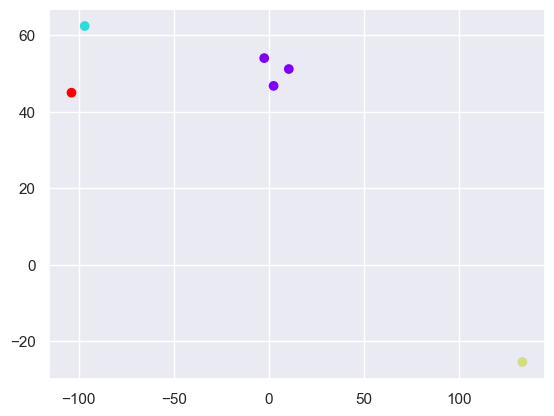

In [46]:
plt.scatter(df['Longitude'],df['Latitude'],c=df['Cluster'],cmap='rainbow');

**Dalam algoritme unsupervised K-means, tujuan kita adalah untuk membuat klaster secara optimal. Namun, kita tidak ingin jumlah klaster sama dengan jumlah data yang ada, karena hal tersebut tidak akan memberikan nilai tambah yang signifikan. Sebaliknya, kita ingin membuat klaster dengan jumlah yang minimal, tetapi tetap memberikan pemahaman yang berguna tentang pola atau kelompok yang ada dalam data.**

#### Mencoba clustering berdasarkan `Language`

<Axes: xlabel='Longitude', ylabel='Latitude'>

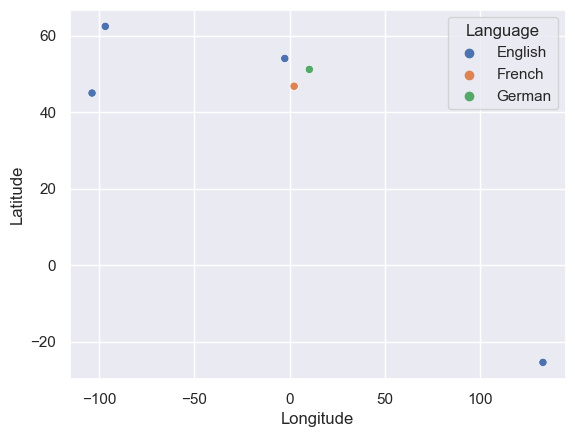

In [12]:
sns.scatterplot(x=df['Longitude'],y=df['Latitude'],hue=df['Language'])

In [68]:
language_df = df.copy().drop('Cluster',axis=1)
language_df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [69]:
language_df['Language'].value_counts()

English    4
French     1
German     1
Name: Language, dtype: int64

In [70]:
language = language_df[['Language']].replace({'English': 0, 'French': 2, 'German': 3})
language

,Language
0,0
1,0
2,2
3,0
4,3
5,0


In [72]:
kmeans = KMeans(3,random_state=42)

In [73]:
kmeans.fit_predict(language)

array([0, 0, 2, 0, 1, 0])

In [74]:
kmeans.labels_

array([0, 0, 2, 0, 1, 0])

<Axes: xlabel='Longitude', ylabel='Latitude'>

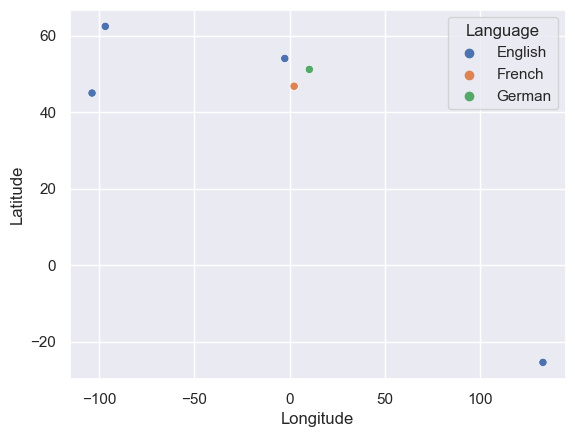

In [75]:
sns.scatterplot(x=df['Longitude'],y=df['Latitude'],hue=df['Language'])

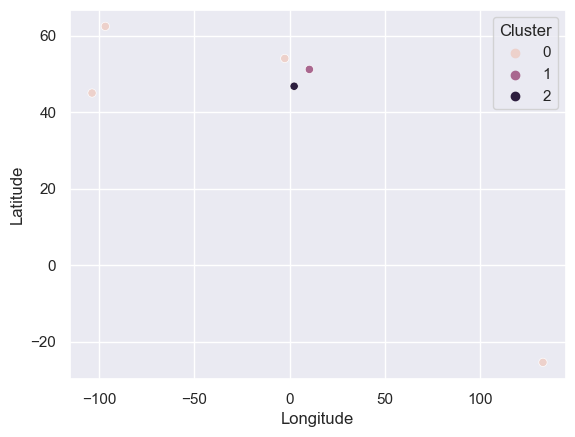

In [76]:
sns.scatterplot(x=df['Longitude'],y=df['Latitude'],hue=kmeans.labels_)
plt.legend(title='Cluster');

In [77]:
language

,Language
0,0
1,0
2,2
3,0
4,3
5,0


In [78]:
language['Language'] = language_df['Language']

In [79]:
language['Cluster'] = kmeans.labels_
language

,Language,Cluster
0,English,0
1,English,0
2,French,2
3,English,0
4,German,1
5,English,0


|    | Language |   Cluster |
|----|----------|----------:|
|  0 | English  |         0 |
|  1 | English  |         0 |
|  2 | French   |         2 |
|  3 | English  |         0 |
|  4 | German   |         1 |
|  5 | English  |         0 |


Dalam contoh di atas, terdapat tiga klaster yang diberi label 0, 1, dan 2. Anda dapat melihat bahwa data dengan bahasa 'French' diberi label klaster 2, data dengan bahasa 'English' diberi label klaster 0, dan data dengan bahasa 'German' diberi label klaster 1.

Interpretasi hasil prediksi k-means clustering ini bergantung pada konteks dan pemahaman domain Anda. Dalam hal ini, Anda dapat mengatakan bahwa k-means clustering telah mengelompokkan data berdasarkan bahasa yang digunakan. Data dengan bahasa yang serupa atau mirip diklasterkan bersama dalam satu kelompok.

Namun, perlu dicatat bahwa interpretasi hasil prediksi k-means clustering ini bersifat relatif. Label klaster yang diberikan hanyalah representasi angka untuk setiap kelompok, dan tidak memiliki makna spesifik secara inheren. Oleh karena itu, penting untuk melakukan analisis lebih lanjut terhadap klaster yang terbentuk dan menerapkan pengetahuan domain untuk memberikan makna yang lebih dalam terhadap hasil clustering.

### Simpel Kmeans Clustering pada data yang lebih besar

In [86]:
raw_data = pd.read_csv('Countries.csv')
raw_data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [87]:
X = raw_data[['Longitude','Latitude']]
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [96]:
kmeans = KMeans(5)

In [97]:
cluster = kmeans.fit_predict(X)
cluster

array([3, 1, 1, 3, 4, 4, 4, 1, 3, 1, 0, 1, 2, 1, 3, 2, 4, 1, 1, 4, 4, 4,
       2, 4, 1, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 2, 2, 1, 1, 4, 3, 2, 4, 1,
       1, 1, 0, 3, 1, 4, 3, 3, 3, 3, 4, 4, 4, 4, 1, 3, 4, 3, 4, 3, 1, 1,
       4, 4, 1, 4, 2, 3, 4, 4, 2, 1, 4, 1, 4, 4, 4, 4, 4, 1, 4, 3, 4, 3,
       2, 3, 2, 1, 3, 4, 3, 4, 2, 4, 1, 2, 1, 4, 1, 1, 4, 1, 4, 3, 4, 1,
       2, 1, 1, 1, 1, 2, 3, 3, 2, 4, 1, 2, 1, 4, 4, 3, 4, 1, 1, 4, 4, 4,
       2, 3, 4, 4, 4, 1, 1, 3, 2, 4, 4, 4, 2, 4, 2, 2, 1, 4, 3, 1, 1, 2,
       1, 2, 4, 2, 4, 3, 0, 4, 4, 1, 2, 2, 1, 1, 3, 0, 3, 2, 2, 2, 4, 3,
       2, 4, 3, 1, 0, 1, 4, 2, 1, 4, 1, 1, 1, 4, 2, 3, 4, 2, 4, 3, 4, 1,
       1, 3, 4, 4, 3, 4, 4, 4, 1, 3, 1, 1, 3, 4, 4, 2, 1, 1, 2, 0, 3, 4,
       4, 2, 1, 1, 4, 3, 3, 1, 4, 3, 3, 3, 3, 2, 2, 0, 0, 1, 1, 1, 1])

In [98]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = cluster
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,3
1,Afghanistan,66.004734,33.835231,1
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,3
4,Albania,20.049834,41.142450,4
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,0
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


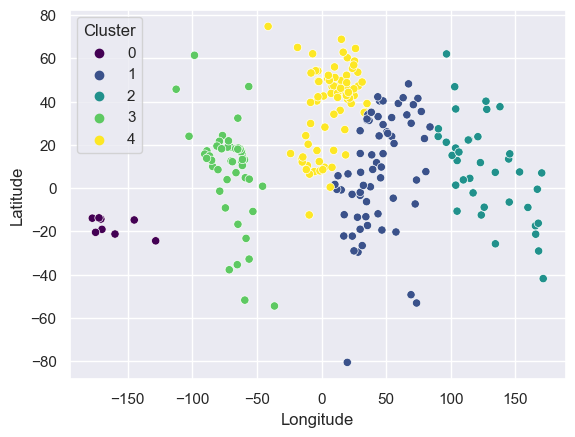

In [99]:
sns.scatterplot(x=data_with_clusters['Longitude'], y=data_with_clusters['Latitude'],
            hue=data_with_clusters['Cluster'], palette='viridis');